In [ ]:
import os, shutil
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
print('total test  images:', len(os.listdir(test_dir)))

print('total training images:', len(os.listdir(train_dir)))

print('total validation images:', len(os.listdir(validation_dir)))



total test  images: 3
total training images: 3
total validation images: 3


In [ ]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(48, 48, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(Dropout(0.25))
model.add(layers.Dense(3, activation='softmax'))

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                  

In [ ]:
cv2.ocl.setUseOpenCL(False)

In [ ]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',
                    optimizer=optimizers.Adam(lr=0.0001, decay=1e-6),
                    metrics=['acc'])


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
                      train_dir,
                      target_size=(48, 48),
                      batch_size=64,
                      color_mode="grayscale",
                      class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size=(48, 48),
                        batch_size=64,
                        color_mode="grayscale",
                        class_mode='categorical')


Found 1314 images belonging to 3 classes.
Found 1314 images belonging to 3 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (64, 48, 48, 1)
labels batch shape: (64, 3)


In [ ]:
# history = model.fit_generator(
history = model.fit(
            train_generator,
            # steps_per_epoch=10,
            steps_per_epoch=50,
            # epochs=50,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=50)

Epoch 1/30
21/50 [===========>..................] - ETA: 56s - loss: 1.0562 - acc: 0.4490

50/50 [==============================] - 71s 1s/step - loss: 1.0562 - acc: 0.4490 - val_loss: 1.0483 - val_acc: 0.4072


In [ ]:
model.save('fypProject.h5')


In [ ]:
# model.save_weights('fypProject1.h5')

# Save the Model to JSON
model_json = model.to_json()
with open('fypPro.json', 'w') as json_file:
    json_file.write(model_json)
    

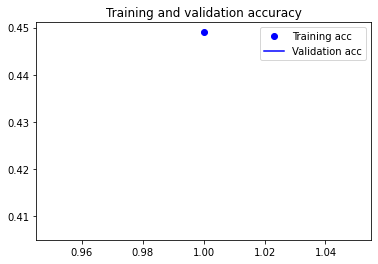

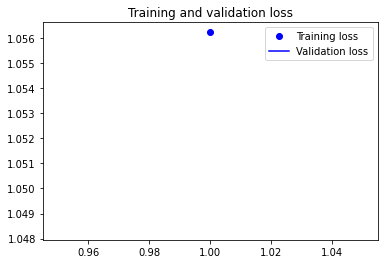

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


In [ ]:
#  Import few more necessary libraries.
from keras.models import load_model
# from keras.preprocessing import image
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img

# Function to load and prepare the image in right shape
def load_image(filename):
	# Load the image
	img = load_img(filename, grayscale=True, target_size=(48, 48))
	# img = load_img(filename,  target_size=(48, 48))
	# Convert the image to array
	img = img_to_array(img)
	# Reshape the image into a sample of 1 channel
	img = img.reshape(1, 48, 48, 1)
	# Prepare it as pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img


img = load_image(load_image3)
# Load the saved model
model = load_model('/content/fypProject.h5')
# Predict the apparel class
class_prediction =  model.predict(img)
print(class_prediction[0])
if class_prediction[0].all() == 0:
  product = "nail"
elif class_prediction[0].all() == 1:
  product = "head"
elif class_prediction[0].all() == 2:
  product = "Lips"
else:
  product = "Normal"

print(product)

1/1 [==============================] - 0s 87ms/step
[0.2518183  0.29150212 0.45667955]
head


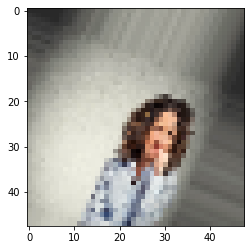

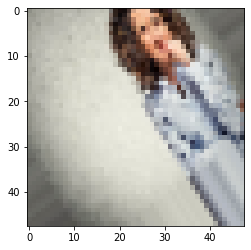

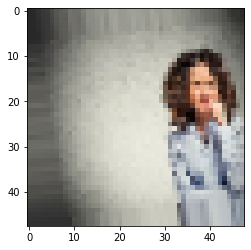

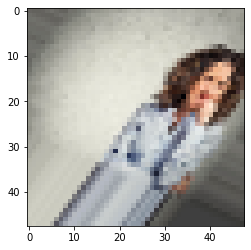

In [ ]:
# from keras.preprocessing import image
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img
fnames = [os.path.join(test_dir_for_img, fname) for
    fname in os.listdir(test_dir_for_img)]
img_path = fnames[3]
img = load_img(img_path, target_size=(48, 48))

x = img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                          input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(48, 48),
            batch_size=64,
            class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(48, 48),
            batch_size=64,
            class_mode='categorical')
# history = model.fit_generator(
history = model.fit(
            train_generator,
            steps_per_epoch=50,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=50)



Found 1314 images belonging to 3 classes.
Found 1314 images belonging to 3 classes.
Epoch 1/30


InvalidArgumentError: ignored

In [ ]:
model.save('tb_and_normal_2.h5')

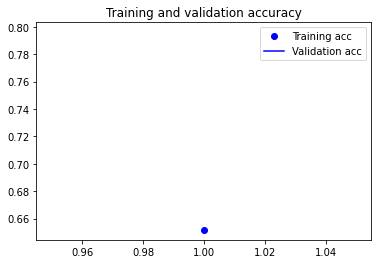

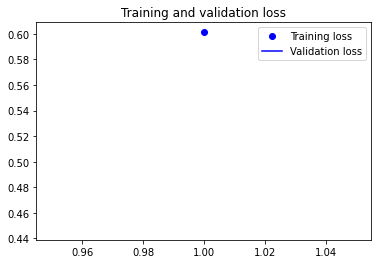

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
print(acc)

NameError: ignored